# Backpropagation

This first lecture talks about backpropagation and other topics relating to training neural networks.

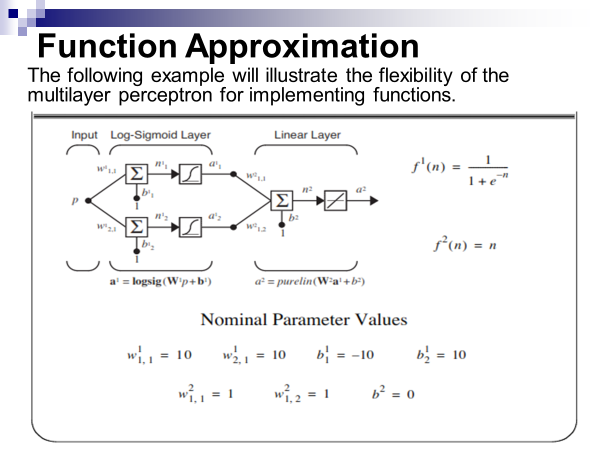

A helpful way to remember the indices of weights and biases is:

$W^{layer}_{destination,\ source}$ <br><br>
$b^{layer}_{source}$

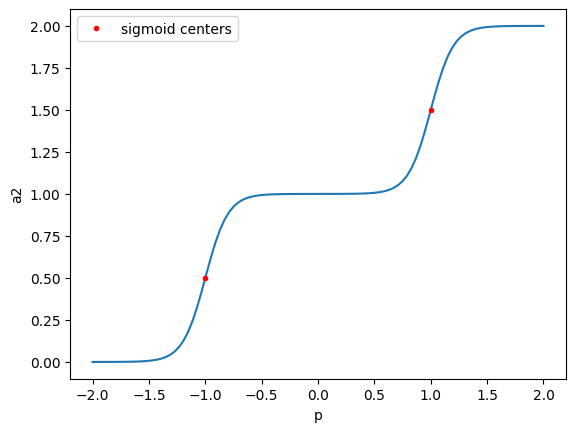

In [1]:
# Implementing the first example
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(n):
    return 1/(1 + np.exp(-n))

def network_example1(input):
    w1 = np.array([[10], [10]])
    b1 = np.array([[-10], [10]])
    w2 = np.array([[1, 1]])
    b2 = np.array([[0]])
    
    a1 = sigmoid(w1@input + b1)
    a2 = w2@a1 + b2
    
    return a2

p = np.linspace(-2, 2, 100).reshape(1, -1)
output = network_example1(p)

plt.plot(p[0], output[0])
plt.plot([-1, 1], network_example1(np.array([[-1, 1]]))[0], 'r.', label = 'sigmoid centers')
plt.xlabel('p')
plt.ylabel('a2')
plt.legend(loc = 'best')
plt.show()

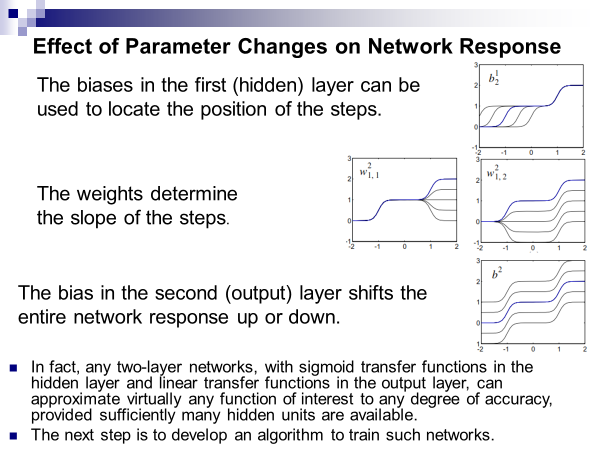

The above example shows that a neural network with a sigmoid activation function in the first layer and a linear activation function in the second layer can approximate any function to any degree of accuracy, provided that sufficiently many hidden units are available. 

## The backpropagation algorithm

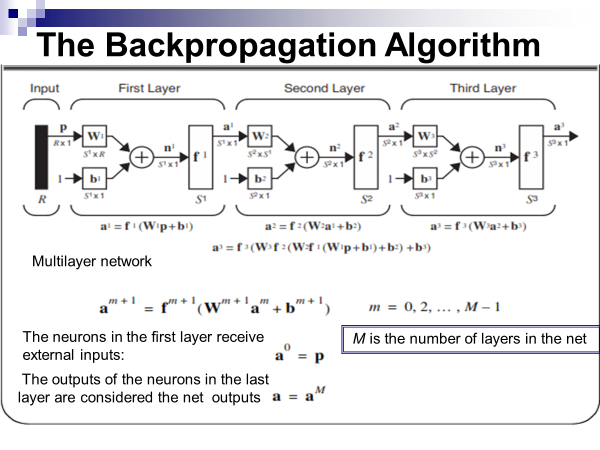

__Note:__ $m$ should be: $m = 0, 1, 2, ..., M-1$

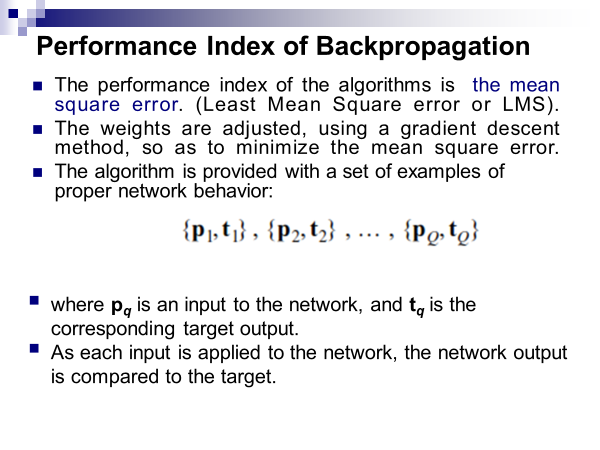

The performance index means the "loss" used to measure how well the network performes. 

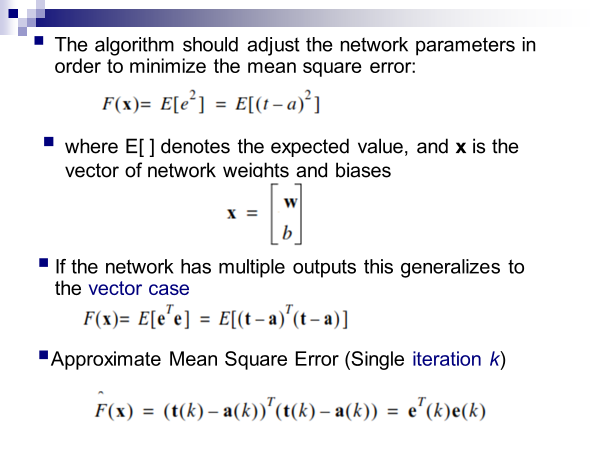

$\hat{F}(x)$ means simply the mean squared error between the output and target.

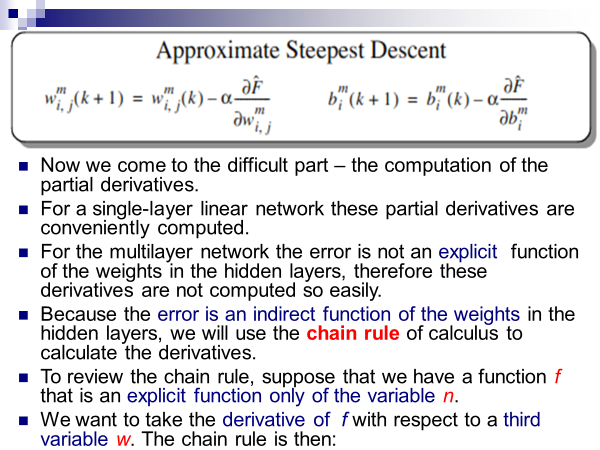

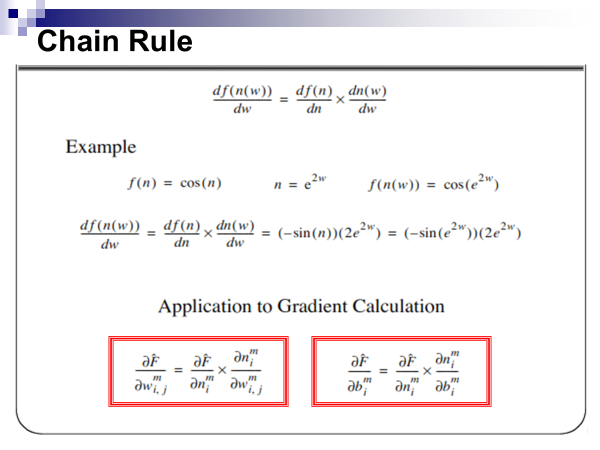

__Note:__ n means the net input to the given layer.

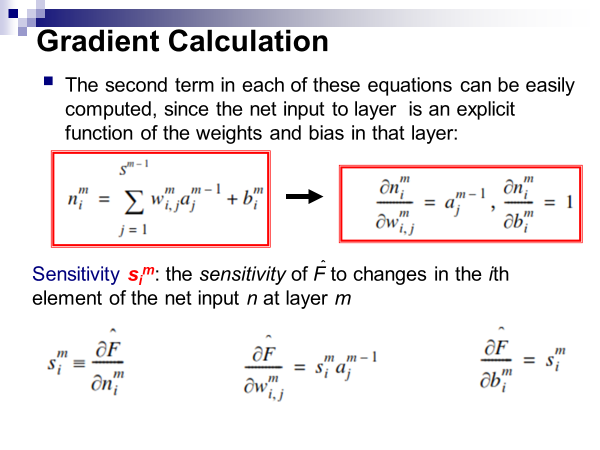

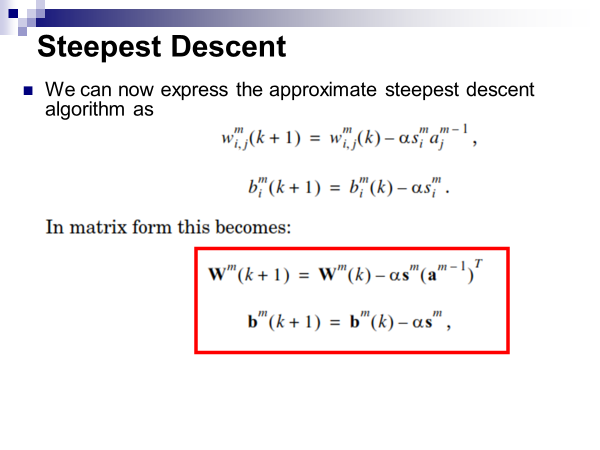

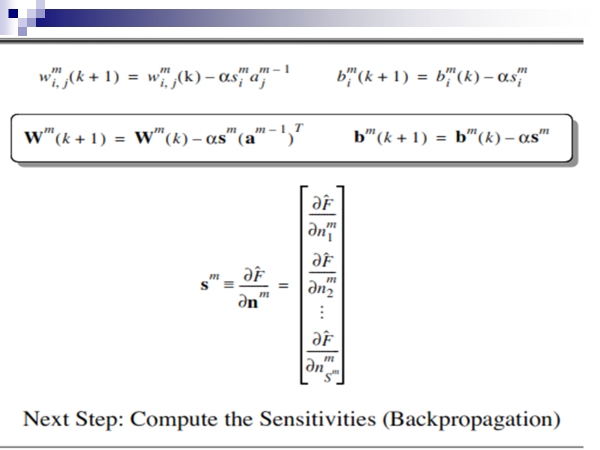

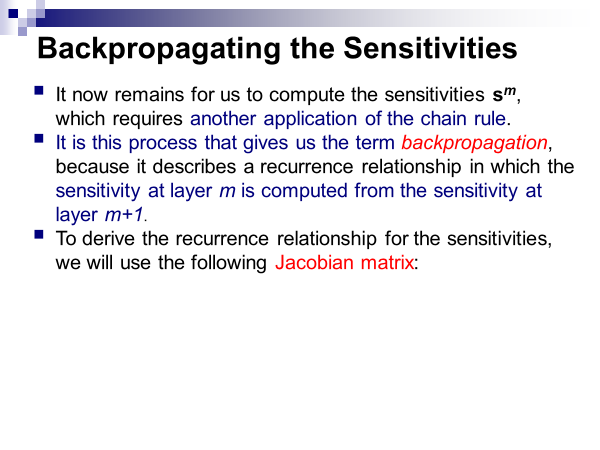

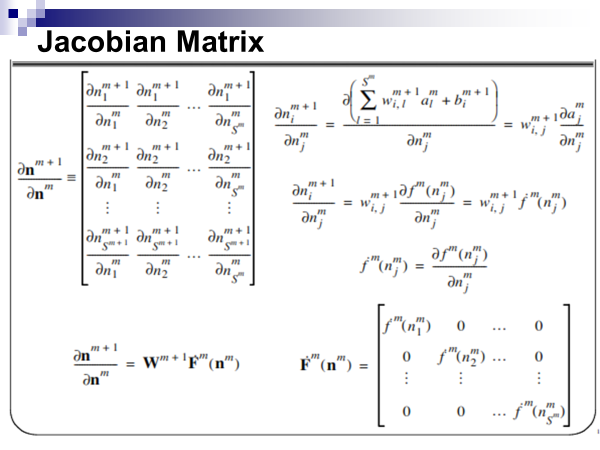

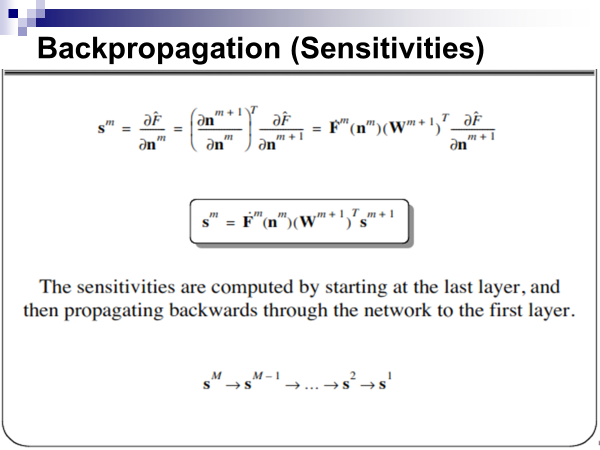

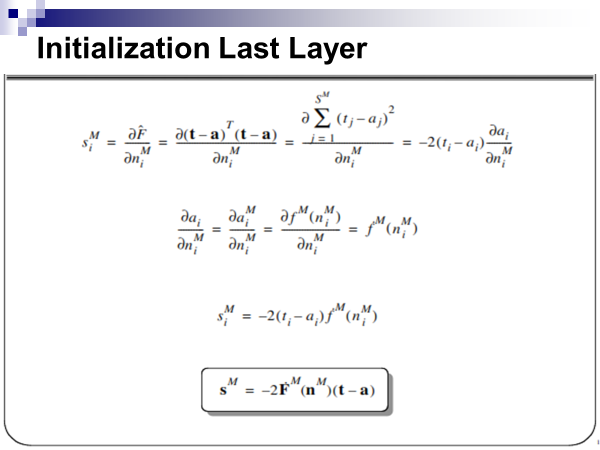

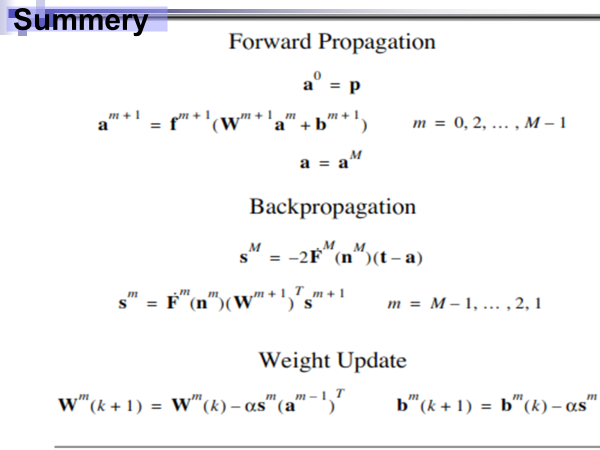

### Example 2 implementation

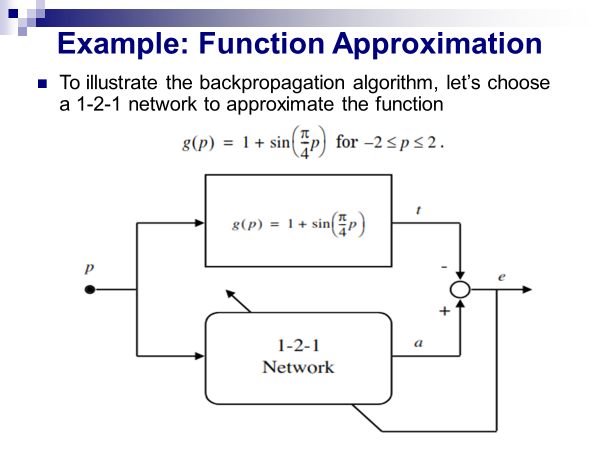

First, lets define the function to be approximated.

In [2]:
def g(p):
    # Note: p should be between -2 and 2
    if np.any(p < -2):
        p[p<-2] = -2
    elif np.any(p > 2):
        p[p > 2] = 2
        
    return 1 + np.sin(np.pi/4 * p)

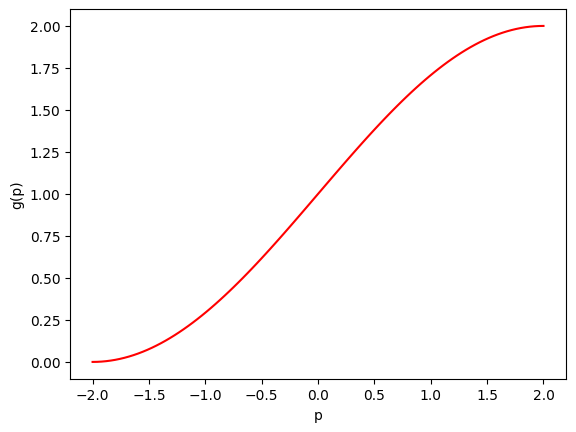

In [3]:
#check the output
p = np.linspace(-2, 2, 100)
output = g(p)

plt.plot(p, output, 'r-')
plt.xlabel('p')
plt.ylabel('g(p)')
plt.show()

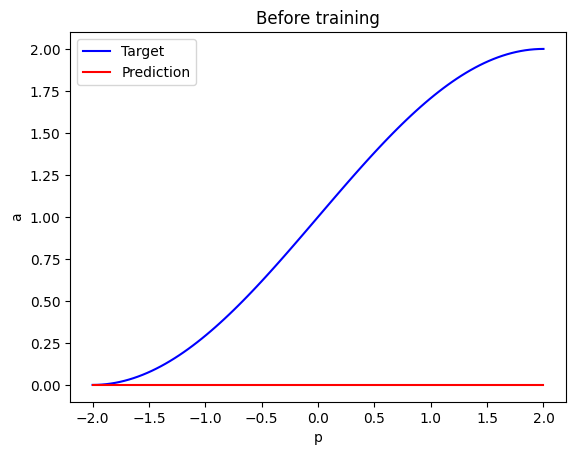

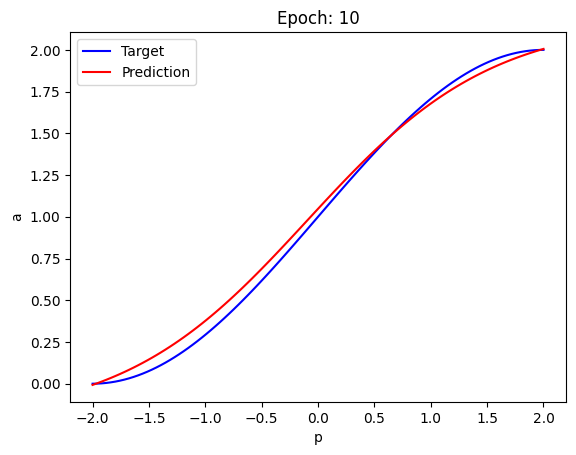

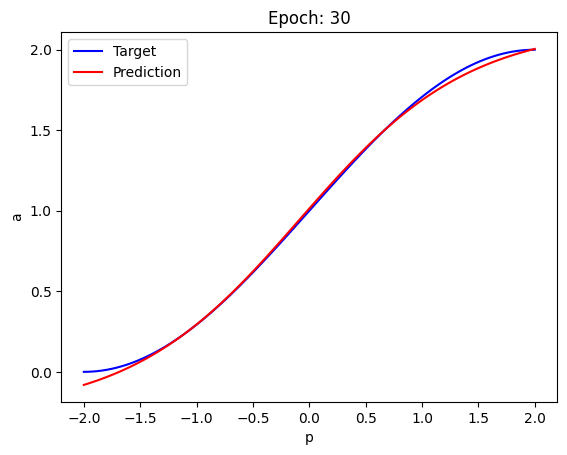

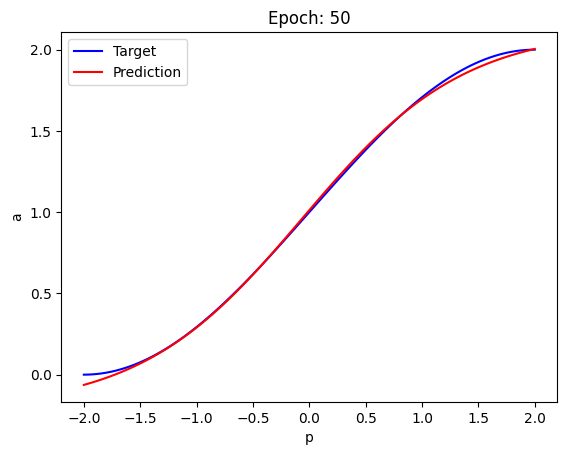

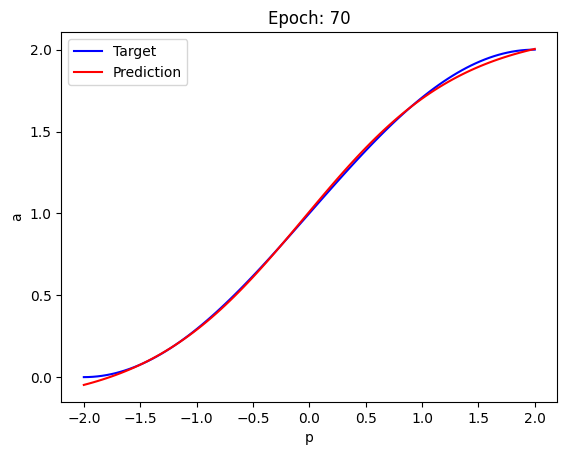

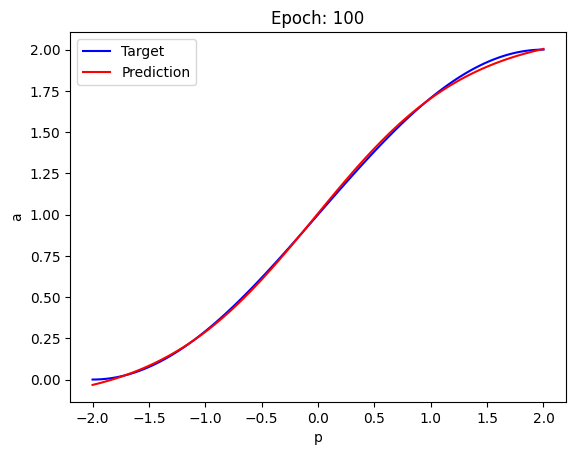

In [4]:
from utilities import NeuralNetwork
network = NeuralNetwork([1, 2, 1], learning_rate = 0.1, initialization = 'zero')

prediction = network.predict(p.reshape(1, -1))[0]
plt.title('Before training')
plt.plot(p, output, 'b-', label = 'Target')
plt.plot(p, prediction, 'r-', label = 'Prediction')
plt.legend(loc = 'best')
plt.xlabel('p')
plt.ylabel('a')
plt.show()

predictions = []
intermediate_epochs = [9, 29, 49, 69, 99]
num_epochs = 100
for epoch in range(num_epochs):
    for i in p:
        network.fit(np.array([[i]]), g(i))
    
    if epoch in intermediate_epochs:
        predictions.append(network.predict(p.reshape(1, -1))[0])

for i, prediction in enumerate(predictions):
    plt.title(f'Epoch: {intermediate_epochs[i] + 1}')
    plt.plot(p, output, 'b-', label = 'Target')
    plt.plot(p, prediction, 'r-', label = 'Prediction')
    plt.legend(loc = 'best')
    plt.xlabel('p')
    plt.ylabel('a')
    plt.show()
    
    